1687358161.842863
1687358161.8435478
1687358161.8439429


/var/folders/vf/842hmrqn18z65j0fs1m3p8200000gn/T/ipykernel_38591/3409596958.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(beta*E) + 1 )


1687358713.6159449
[[[1.97678319e-10 1.18650822e-10 1.69320095e-10 ... 6.43487627e-11
   6.40420166e-11 6.25662370e-11]
  [1.16045745e-10 1.96357068e-10 1.41089889e-10 ... 1.08776638e-10
   1.08443945e-10 1.08108443e-10]
  [1.30734420e-10 1.19177609e-10 1.41089889e-10 ... 1.13146310e-10
   1.08443946e-10 1.08108443e-10]
  ...
  [1.43162261e-10 1.43153767e-10 1.43128288e-10 ... 1.07110883e-10
   1.06731947e-10 1.03870770e-10]
  [1.43162261e-10 1.43153767e-10 1.43128288e-10 ... 1.13063570e-10
   1.06731947e-10 1.06350833e-10]
  [1.43162261e-10 1.43153767e-10 1.43128288e-10 ... 1.13063570e-10
   1.12661628e-10 1.06350834e-10]]

 [[2.04353711e-10 1.18637018e-10 1.81847062e-10 ... 6.39597952e-11
   6.38128741e-11 6.13509141e-11]
  [1.14845686e-10 1.96357446e-10 1.41096191e-10 ... 1.08776643e-10
   1.08443945e-10 1.08108444e-10]
  [1.30732162e-10 1.19176859e-10 1.41088356e-10 ... 1.13146193e-10
   1.08569321e-10 1.08108443e-10]
  ...
  [1.43162261e-10 1.43153767e-10 1.43128288e-10 ... 1.0711

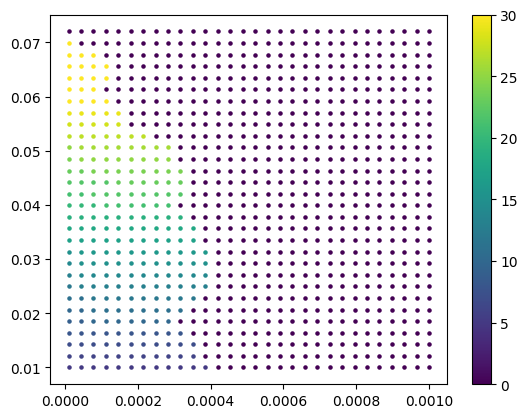

In [10]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from time import time
#from scipy.integrate import quad

print(time())

## gap_eq をdef

def e_k_spin(k1, k2, q, y, B): 
    return 2*t*(np.cos(a*(k1+q/2))+np.cos(a*(k2))) - u + y * 1/2 * gu * B

def e_k_s(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) + e_k_spin(-1*k1, k2, q, -1, B))/2

def e_k_a(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) - e_k_spin(-1*k1, k2, q, -1, B))/2

def E_k_q(k1, k2, gap, q, B):
    return np.sqrt(e_k_s(k1, k2, q, B)**2 + gap**2)

def E_k_q_s(k1, k2, gap, q, y, B):
    return E_k_q(k1, k2, gap, q, B) + y * e_k_a(k1, k2, q, B)

def Fermi(beta, E):
    return 1 / (np.exp(beta*E) + 1 )

def func(k1, k2, gap, q, B): 
    return gap*(1-Fermi(beta, E_k_q_s(k1, k2, gap, q, -1, B))-Fermi(beta, E_k_q_s(k1, k2, gap, q, 1, B)))/(2*E_k_q(k1, k2, gap, q, B))

def rhs(gap, q, B):
    k1 = -1 * np.pi/a + 2 * arange(N) * np.pi / (a * N)
    kx, ky = meshgrid(k1, k1, indexing='ij')
    f = func(kx, ky, gap, q, B)
    return (V / (N**2)) * sum(f)

print(time())

##パラメータの調整
N, V, t, a, u, gu, n0, n1, n2 =30, 1, 1, 1, 3, 1, 90, 30, 30    # 7.525 #9.21
qs   = np.linspace(0,0.1,n0)  #(np.pi/a)
Bs   = np.linspace(0.01,0.072,n1)     #np.linspace(0,0.08,n1)
kBTs = np.linspace(1e-5,1e-3,n2)



print(time())

##ギャップの逐次計算
# 各温度、各磁場において、重心運動量qごとにギャップを記録する
# ans[h][i][j][0] で各重心運動量,各磁場、各温度において記録する
ans = []
for h in range(n2):
    ans0 = []
    for i in range(n1):
        ans1 = []
        for j in range(n0): # それぞれの温度で秩序パラメータを計算
            beta, d0 = 1/kBTs[h], 100.0
            for k in range(1000): # 収束するまで最大1000回ループ
                d1 = rhs(d0, qs[j], Bs[i]) 
                if abs(d1-d0) < 1e-10: break # 収束チェック
                d0 = d1
            ans1.append(d0)
        ans0.append(ans1)
    ans.append(ans0)
ans = np.array(ans)

print(time())
print(ans)


# 重心運動量qごとにもっともギャップの立ちやすいqを取り出す

ans_h = []
ans_i = []
q_max_1 = []
for h in range(n2):
    q_max_2 = []
    ans_h = ans[h]
    for i in range(n1):
        ans_i = ans_h[i]
        ans_l = ans_i.tolist()
        max_q = float(max(ans_i))
        if max_q < 0.001: 
            max_index = 0
        else:
            max_index = ans_l.index(max_q)
        # print(ans_i)
        # print(max_q)
        q_max_2.append(max_index)
    q_max_1.append(q_max_2)
q_max_1 = np.array(q_max_1)
print(q_max_1)

# q=0をBCSへq＝＼0をFFLOへと色分けする
for h in range(n2):
    for i in range(n1):
            figure = plt.scatter(kBTs[h], Bs[i], 5, c = q_max_1[h][i], cmap='viridis' ,vmin=0, vmax=30) # c = q_max[h][i]
c= plt.colorbar()
plt.savefig("FFLO_BCS_phase_figure.png")
plt.show()
